## Introduction

The goal of this project is to design a classifier to use for sentiment analysis of product reviews. Our training set consists of reviews written by Amazon customers for various food products. The reviews, originally given on a 5 point scale, have been adjusted to a +1 or -1 scale, representing a positive or negative review, respectively.

Below are two example entries from our dataset. Each entry consists of the review and its label. The two reviews were written by different customers describing their experience with a sugar-free candy.

Review	label
Nasty No flavor. The candy is just red, No flavor. Just plan and chewy. I would never buy them again	 −1 
YUMMY! You would never guess that they're sugar-free and it's so great that you can eat them pretty much guilt free! i was so impressed that i've ordered some for myself (w dark chocolate) to take to the office. These are just EXCELLENT!	 1 
In order to automatically analyze reviews, you will need to complete the following tasks:

Implement and compare three types of linear classifiers: the perceptron algorithm, the average perceptron algorithm, and the Pegasos algorithm.

Use your classifiers on the food review dataset, using some simple text features.

Experiment with additional features and explore their impact on classifier performance.



In this project you will be implementing linear classifiers beginning with the Perceptron algorithm. You will begin by writing your loss function, a hinge-loss function. For this function you are given the parameters of your model  θ  and  θ_0 . Additionally, you are given a feature matrix in which the rows are feature vectors and the columns are individual features, and a vector of labels representing the actual sentiment of the corresponding feature vector.

## Hinge Loss on One Data Sample

First, implement the basic hinge loss calculation on a single data-point. Instead of the entire feature matrix, you are given one row, representing the feature vector of a single data sample, and its label of +1 or -1 representing the ground truth sentiment of the data sample.

Reminder: You can implement this function locally first, and run python test.py in your sentiment_analysis directory to validate basic functionality before checking against the online grader here.

Available Functions: You have access to the NumPy python library as np; No need to import anything.

In [1]:
def hinge_loss_single(feature_vector, label, theta, theta_0):
    """
    Finds the hinge loss on a single data point given specific classification
    parameters.

    Args:
        feature_vector - A numpy array describing the given data point.
        label - A real valued number, the correct classification of the data
            point.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.


    Returns: A real number representing the hinge loss associated with the
    given data point and parameters.
    """
    # Your code here
#     import sys
#     eps = sys.float_info.epsilon
    import numpy as np
    agreement = label * (np.matmul(theta, feature_vector) + theta_0)
    if agreement >= 1:
        return 0
    else: return 1 - agreement
    raise NotImplementedError

In [2]:
import numpy as np
feature_vector = np.array([1, 2])
label, theta, theta_0 = 1, np.array([-1, 1]), -0.2

In [3]:
hinge_loss_single(feature_vector, label, theta, theta_0)

0.19999999999999996

## The Complete Hinge Loss

Now it's time to implement the complete hinge loss for a full set of data. Your input will be a full feature matrix this time, and you will have a vector of corresponding labels. The kth row of the feature matrix corresponds to the kth element of the labels vector. This function should return the appropriate loss of the classifier on the given dataset.

Available Functions: You have access to the NumPy python library as np, and your previous function as hinge_loss_single

In [4]:
def hinge_loss_full(feature_matrix, labels, theta, theta_0):
    """
    Finds the total hinge loss on a set of data given specific classification
    parameters.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.


    Returns: A real number representing the hinge loss associated with the
    given dataset and parameters. This number should be the average hinge
    loss across all of the points in the feature matrix.
    """
    # Your code here
    hinge_loss = []
    import numpy as np
    agreement = 0
    for i in range (len(feature_matrix)):
#         print("feature_matrix: ", feature_matrix[i], "\n","labels: ", labels[i], "\n", "theta: ", theta, "\n", "theta_0: ", theta_0)
        hinge_loss.append(hinge_loss_single(feature_matrix[i], labels[i], theta, theta_0))
        
    return sum(hinge_loss)/len(hinge_loss)
    raise NotImplementedError


In [5]:
import numpy as np
feature_matrix = np.array([[1, 2], [1, 2]])
label, theta, theta_0 = np.array([1, 1]), np.array([-1, 1]), -0.2

In [6]:
hinge_loss_full(feature_matrix, label, theta, theta_0)

0.19999999999999996

## Perceptron Single Step Update

Now you will implement the single step update for the perceptron algorithm (implemented with  0−1  loss). You will be given the feature vector as an array of numbers, the current  θ  and  θ0  parameters, and the correct label of the feature vector. The function should return a tuple in which the first element is the correctly updated value of  θ  and the second element is the correctly updated value of  θ0 .

Available Functions: You have access to the NumPy python library as np.

Tip:: Because of numerical instabilities, it is preferable to identify  0  with a small range  [−ε,ε] . That is, when  x  is a float, “ x=0 " should be checked with  |x|<ε .

In [7]:
def perceptron_single_step_update(
        feature_vector,
        label,
        current_theta,
        current_theta_0):
    """
    Properly updates the classification parameter, theta and theta_0, on a
    single step of the perceptron algorithm.

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        current_theta - The current theta being used by the perceptron
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the perceptron
            algorithm before this update.

    Returns: A tuple where the first element is a numpy array with the value of
    theta after the current update has completed and the second element is a
    real valued number with the value of theta_0 after the current updated has
    completed.
    """
    # Your code here
    
    import numpy as np
    import sys
    eps = sys.float_info.epsilon
    agreement = np.matmul(current_theta, feature_vector) + current_theta_0
#     print("current theta: ", current_theta, "\nfeature vector: ", feature_vector)
    if label * agreement <= eps:
        current_theta = current_theta + label * feature_vector
        current_theta_0 = current_theta_0 + label
#         print("new theta: ", current_theta)
#         print("new theta_0: ", current_theta_0)
    return (current_theta, current_theta_0)
    raise NotImplementedError


In [8]:
feature_vector = np.array([1, 2])
label, theta, theta_0 = 1, np.array([-1, 1]), -1.5

In [9]:
perceptron_single_step_update(feature_vector, label, theta, theta_0)

(array([0, 3]), -0.5)

## Full Perceptron Algorithm

In this step you will implement the full perceptron algorithm. You will be given the same feature matrix and labels array as you were given in The Complete Hinge Loss. You will also be given  T , the maximum number of times that you should iterate through the feature matrix before terminating the algorithm. Initialize  θ  and  θ0  to zero. This function should return a tuple in which the first element is the final value of  θ  and the second element is the value of  θ0 .

Tip: Call the function perceptron_single_step_update directly without coding it again.

Hint: Make sure you initialize theta to a 1D array of shape (n,) and not a 2D array of shape (1, n).

Note: Please call get_order(feature_matrix.shape[0]), and use the ordering to iterate the feature matrix in each iteration. The ordering is specified due to grading purpose. In practice, people typically just randomly shuffle indices to do stochastic optimization.

Available Functions: You have access to the NumPy python library as np and perceptron_single_step_update which you have already implemented.

In [10]:
def get_order(n_samples):
    import random
    try:
        with open(str(n_samples) + '.txt') as fp:
            line = fp.readline()
            return list(map(int, line.split(',')))
    except FileNotFoundError:
        random.seed(1)
        indices = list(range(n_samples))
        random.shuffle(indices)
        return indices

In [11]:
def perceptron(feature_matrix, labels, T):
    """
    Runs the full perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])

    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    theta, the linear classification parameter, after T iterations through the
    feature matrix and the second element is a real number with the value of
    theta_0, the offset classification parameter, after T iterations through
    the feature matrix.
    """
    # Your code here
    import numpy as np
    theta_initial = np.zeros(feature_matrix.shape[1])
    
    theta_0 = 0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
#             print("theta initial: ", theta_initial)
#             print("feature vector initial: ", feature_matrix[i])
            result = perceptron_single_step_update(feature_matrix[i], labels[i], theta_initial, theta_0)
            theta_initial, theta_0 = result[0], result[1]
    return result
    raise NotImplementedError


In [12]:
feature_matrix = np.array([[ 0.4035203,   0.28894458, -0.12486269, -0.04578899,  0.36238546],
 [-0.27751049, -0.27716508,  0.42165351,  0.24132152,  0.28515631],
 [-0.38530347,  0.00116068, -0.33433676, -0.36820732, -0.07616756],
 [ 0.1353266,  -0.10719389, -0.03288649, -0.08073938, -0.28007916],
 [ 0.1824488, -0.01956054, -0.06688538,  0.21609729,  0.18220093],
 [-0.28683194,  0.43843641,  0.49160722,  0.4477392,   0.46135786],
 [ 0.40663016, -0.09465012,  0.38968499, -0.02181301, -0.44431982],
 [ 0.05915232, -0.03751725,  0.15674614, -0.30074138, -0.12557084],
 [-0.10882891, -0.12297511, -0.03260046,  0.37328685,  0.01039494],
 [-0.29082105, -0.09391986,  0.07273626,  0.39260552, -0.2284224 ]])
labels = np.array([-1, 1, 1, -1, -1, 1, -1, -1, -1, 1])

In [13]:
perceptron(feature_matrix, labels, 5)

(array([-1.88537906, -0.14065328,  0.59293704,  0.51691744, -0.63641656]), 0)

## Average Perceptron Algorithm

The average perceptron will add a modification to the original perceptron algorithm: since the basic algorithm continues updating as the algorithm runs, nudging parameters in possibly conflicting directions, it is better to take an average of those parameters as the final answer. Every update of the algorithm is the same as before. The returned parameters  θ , however, are an average of the  θ s across the  nT  steps:

θfinal=(1/nT)*(θ(1)+θ(2)+...+θ(nT)) 

You will now implement the average perceptron algorithm. This function should be constructed similarly to the Full Perceptron Algorithm above, except that it should return the average values of  θ  and  θ0 

Tip: Tracking a moving average through loops is difficult, but tracking a sum through loops is simple.

Note: Please call get_order(feature_matrix.shape[0]), and use the ordering to iterate the feature matrix in each iteration. The ordering is specified due to grading purpose. In practice, people typically just randomly shuffle indices to do stochastic optimization.

Available Functions: You have access to the NumPy python library as np and perceptron_single_step_update which you have already implemented.

In [14]:
def average_perceptron(feature_matrix, labels, T):
    """
    Runs the average perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])


    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    the average theta, the linear classification parameter, found after T
    iterations through the feature matrix and the second element is a real
    number with the value of the average theta_0, the offset classification
    parameter, found after T iterations through the feature matrix.

    Hint: It is difficult to keep a running average; however, it is simple to
    find a sum and divide.
    """
    # Your code here
    import numpy as np
    
    theta_initial = np.zeros(feature_matrix.shape[1])
    theta_sum = np.zeros(feature_matrix.shape[1])
    theta_0 = 0
    theta_0_sum = 0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            theta_initial, theta_0 = perceptron_single_step_update(feature_matrix[i], labels[i], theta_initial, theta_0)
            theta_sum += theta_initial
            theta_0_sum += theta_0
    num_samples = T * feature_matrix.shape[0]
    return (theta_sum/num_samples, theta_0_sum/num_samples)
    raise NotImplementedError


In [15]:
feature_matrix_average = np.array([[1, 2], [-1, 0]])
labels_average = np.array([1, 1])
T = 2

In [16]:
average_perceptron(feature_matrix_average, labels_average, T)

(array([-0.25,  1.5 ]), 1.75)

# 4. Pegasos Algorithm

Project due Mar 2, 2021 18:59 EST
Now you will implement the Pegasos algorithm. For more information, refer to the original paper at original paper.

The following pseudo-code describes the Pegasos update rule.

Pegasos update rule(x(i),y(i),λ,η,θ):
if y(i)(θ⋅x(i))≤1 then
  update θ=(1−ηλ)θ+ηy(i)x(i)
else:
  update θ=(1−ηλ)θ

The η parameter is a decaying factor that will decrease over time. The λ parameter is a regularizing parameter.

In this problem, you will need to adapt this update rule to add a bias term (θ0) to the hypothesis, but take care not to penalize the magnitude of θ0.

## Pegasos Single Step Update

Next you will implement the single step update for the Pegasos algorithm. This function is very similar to the function that you implemented in Perceptron Single Step Update, except that it should utilize the Pegasos parameter update rules instead of those for perceptron. The function will also be passed a λ and η value to use for updates.

Available Functions: You have access to the NumPy python library as np.

In [37]:
def pegasos_single_step_update(
        feature_vector,
        label,
        L,
        eta,
        current_theta,
        current_theta_0):
    """
    Properly updates the classification parameter, theta and theta_0, on a
    single step of the Pegasos algorithm

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        L - The lamba value being used to update the parameters.
        eta - Learning rate to update parameters.
        current_theta - The current theta being used by the Pegasos
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the
            Pegasos algorithm before this update.

    Returns: A tuple where the first element is a numpy array with the value of
    theta after the current update has completed and the second element is a
    real valued number with the value of theta_0 after the current updated has
    completed.
    """
    # Your code here
    import numpy as np
    import sys
    eps = sys.float_info.epsilon

    agreement = np.matmul(current_theta, feature_vector)
    print(label*agreement+current_theta_0)
    if label * agreement + current_theta_0 > 1 + eps:
        new_theta = (1 - eta * L) * current_theta
        new_theta_0 = current_theta_0
    else:
        new_theta = (1 - eta * L) * current_theta + eta * label * feature_vector
        new_theta_0 = current_theta_0 + label * eta
    return(new_theta, new_theta_0)
    raise NotImplementedError
    


In [38]:
feature_vector = np.array([1, 1])
label, theta, theta_0 = 1, np.array([-1, 1]), 1
L = 0.2
eta = 0.1

In [39]:
pegasos_single_step_update(feature_vector, label, L, eta, theta, theta_0,)

1


(array([-0.88,  1.08]), 1.1)

## Full Pegasos Algorithm

Finally you will implement the full Pegasos algorithm. You will be given the same feature matrix and labels array as you were given in Full Perceptron Algorithm. You will also be given T, the maximum number of times that you should iterate through the feature matrix before terminating the algorithm. Initialize θ and θ0 to zero. For each update, set η=1t√ where t is a counter for the number of updates performed so far (between 1 and nT inclusive). This function should return a tuple in which the first element is the final value of θ and the second element is the value of θ0.

Note: Please call get_order(feature_matrix.shape[0]), and use the ordering to iterate the feature matrix in each iteration. The ordering is specified due to grading purpose. In practice, people typically just randomly shuffle indices to do stochastic optimization.

Available Functions: You have access to the NumPy python library as np and pegasos_single_step_update which you have already implemented.

In [20]:
def pegasos(feature_matrix, labels, T, L):
    """
    Runs the Pegasos algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    For each update, set learning rate = 1/sqrt(t),
    where t is a counter for the number of updates performed so far (between 1
    and nT inclusive).

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the algorithm
            should iterate through the feature matrix.
        L - The lamba value being used to update the Pegasos
            algorithm parameters.

    Returns: A tuple where the first element is a numpy array with the value of
    the theta, the linear classification parameter, found after T
    iterations through the feature matrix and the second element is a real
    number with the value of the theta_0, the offset classification
    parameter, found after T iterations through the feature matrix.
    """
    # Your code here
    import numpy as np
    theta = np.zeros(feature_matrix.shape[1])
    theta_0 = 0
    count = 0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            count += 1
            eta = 1/np.sqrt(count)
#             print("eta = ", eta)
            result = pegasos_single_step_update(feature_matrix[i], labels[i], L, eta, theta, theta_0)
            theta, theta_0 = result[0], result[1]
#         print("theta = ", theta)
    return (result)
    raise NotImplementedError


In [21]:
feature_matrix = np.array([[1, 2]])
labels = np.array([1])
T = 1
L = 0.2

In [22]:
pegasos(feature_matrix, labels, T, L)

(array([1., 2.]), 1.0)

theta for Perceptron is 3.9173999999999918, 4.164000000000001
theta_0 for Perceptron is -8.0


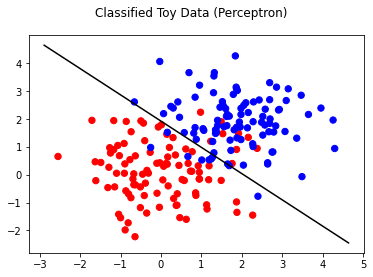

theta for Average Perceptron is 3.47826049999999, 3.611060999999974
theta_0 for Average Perceptron is -6.373


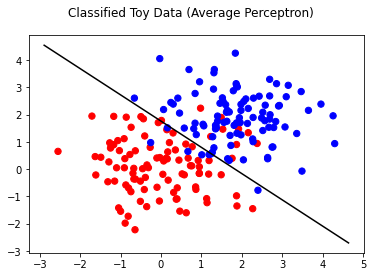

theta for Pegasos is 3.275088864724912, 3.077450346436038
theta_0 for Pegasos is -14.217957239009186


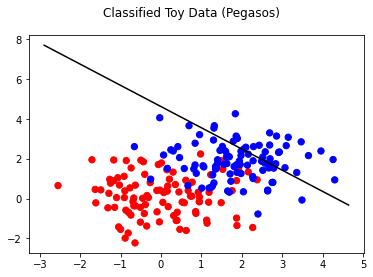

In [23]:
import project1 as p1
import utils
import numpy as np

#-------------------------------------------------------------------------------
# Data loading. There is no need to edit code in this section.
#-------------------------------------------------------------------------------

train_data = utils.load_data('reviews_train.tsv')
val_data = utils.load_data('reviews_val.tsv')
test_data = utils.load_data('reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = p1.bag_of_words(train_texts)

train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)

#-------------------------------------------------------------------------------
# Problem 5
#-------------------------------------------------------------------------------

toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')

T = 10
L = 0.2

thetas_perceptron = p1.perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = p1.average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = p1.pegasos(toy_features, toy_labels, T, L)

def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)

In [ ]:
T = 10

theta for Perceptron is 3.9173999999999918, 4.164000000000001
theta_0 for Perceptron is -8.0
theta for Average Perceptron is 3.47826049999999, 3.611060999999974
theta_0 for Average Perceptron is -6.373
theta for Pegasos is 0.7346463119064065, 0.6300224592973831
theta_0 for Pegasos is -1.2195071848898564

T = 100

theta for Perceptron is 3.9264999999998995, 3.520599999999991
theta_0 for Perceptron is -7.0
theta for Average Perceptron is 3.8735113949998436, 3.8802419599999936
theta_0 for Average Perceptron is -7.01295
theta for Pegasos is 0.6895719966639845, 0.5714970011329141
theta_0 for Pegasos is -1.2426141399854491

T = 500

theta for Perceptron is 3.31889999999955, 5.5647999999999795
theta_0 for Perceptron is -8.0
theta for Average Perceptron is 3.8687850989995813, 3.8903095659998432
theta_0 for Average Perceptron is -7.05808
theta for Pegasos is 0.6708387963810953, 0.5849882176940737
theta_0 for Pegasos is -1.2308657435730184

T = 1000

theta for Perceptron is 2.512799999999105, 4.125199999999998
theta_0 for Perceptron is -7.0
theta for Average Perceptron is 3.876074723499454, 3.9073112719998364
theta_0 for Average Perceptron is -7.081905
theta for Pegasos is 0.661395833715547, 0.5949551621199267
theta_0 for Pegasos is -1.2310716055759896

T = 10000

theta for Perceptron is 2.710799999991158, 4.748199999999745
theta_0 for Perceptron is -8.0
theta for Average Perceptron is 3.8615468785446034, 3.898118649199404
theta_0 for Average Perceptron is -7.0714955
theta for Pegasos is 0.6499940747976393, 0.6036927763627459
theta_0 for Pegasos is -1.2368593909880747

In [1]:
import project1 as p1
import utils
import numpy as np

In [37]:
new_dict = []
nums = []
with open('stopwords.txt', 'r') as f:
    for line in f:
            splitLine = line.split()
            new_dict.append(splitLine)
new_dict
# for i in range(1, len(new_dict)+1):
#     nums.append(i)
# d1 = zip(new_dict, nums)
# print(dict(d1))

[['i'],
 ['me'],
 ['my'],
 ['myself'],
 ['we'],
 ['our'],
 ['ours'],
 ['ourselves'],
 ['you'],
 ['your'],
 ['yours'],
 ['yourself'],
 ['yourselves'],
 ['he'],
 ['him'],
 ['his'],
 ['himself'],
 ['she'],
 ['her'],
 ['hers'],
 ['herself'],
 ['it'],
 ['its'],
 ['itself'],
 ['they'],
 ['them'],
 ['their'],
 ['theirs'],
 ['themselves'],
 ['what'],
 ['which'],
 ['who'],
 ['whom'],
 ['this'],
 ['that'],
 ['these'],
 ['those'],
 ['am'],
 ['is'],
 ['are'],
 ['was'],
 ['were'],
 ['be'],
 ['been'],
 ['being'],
 ['have'],
 ['has'],
 ['had'],
 ['having'],
 ['do'],
 ['does'],
 ['did'],
 ['doing'],
 ['a'],
 ['an'],
 ['the'],
 ['and'],
 ['but'],
 ['if'],
 ['or'],
 ['because'],
 ['as'],
 ['until'],
 ['while'],
 ['of'],
 ['at'],
 ['by'],
 ['for'],
 ['with'],
 ['about'],
 ['against'],
 ['between'],
 ['into'],
 ['through'],
 ['during'],
 ['before'],
 ['after'],
 ['above'],
 ['below'],
 ['to'],
 ['from'],
 ['up'],
 ['down'],
 ['in'],
 ['out'],
 ['on'],
 ['off'],
 ['over'],
 ['under'],
 ['again'],
 ['furthe

In [23]:
d1=zip(new_dict)
d1

In [7]:
{i
me
my
myself
we
our
ours
ourselves
you
your
yours
yourself
yourselves
he
him
his
himself
she
her
hers
herself
it
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
should
now
}

SyntaxError: invalid syntax (<ipython-input-7-364d9757bc05>, line 2)